<a href="https://colab.research.google.com/github/yarkalm/machinelearning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Калмыков Я.А.
# Лабораторная работа по методам искусственного интеллекта (MNIST)
# Задание 1


In [ ]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional.conv1d import activations

In [ ]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
y_train= keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=6,batch_size=128)

Epoch 1/6
469/469 [==============================] - 24s 50ms/step - loss: 1.7230 - accuracy: 0.9253 - val_loss: 0.1989 - val_accuracy: 0.9624
Epoch 2/6
469/469 [==============================] - 20s 42ms/step - loss: 0.0983 - accuracy: 0.9769 - val_loss: 0.1746 - val_accuracy: 0.9636
Epoch 3/6
469/469 [==============================] - 21s 44ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.1632 - val_accuracy: 0.9701
Epoch 4/6
469/469 [==============================] - 20s 43ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.1411 - val_accuracy: 0.9750
Epoch 5/6
469/469 [==============================] - 21s 45ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.1792 - val_accuracy: 0.9703
Epoch 6/6
469/469 [==============================] - 20s 42ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.1712 - val_accuracy: 0.9724


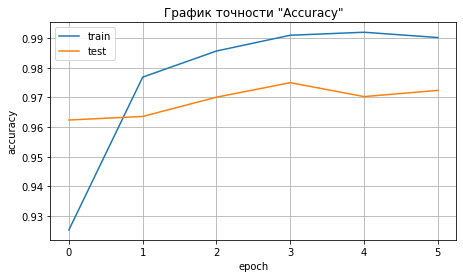

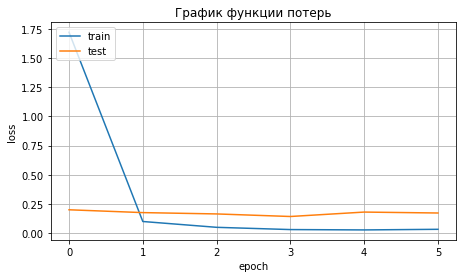

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='test')
ax.set_title('График точности "Accuracy"')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('График функции потерь')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)

plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
None


123
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  21625426 0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  25 1552531161  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  6  21625425417 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  13625423862 2  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  70 22023855 0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  25 22225283 0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1842541350  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  70 24124641 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  17 2272541090  0  0  0  3  9  5  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  13525420519 0  0  0  1391942542136

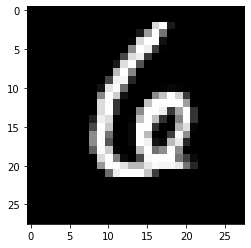

In [ ]:
num = int(input())

for i in range(28):
  for j in range(28):
    if len(str(x_test[num].reshape((28,28))[i][j]))==1:
      print(x_test[num].reshape((28,28))[i][j],end = '  ')
    elif len(str(x_test[num].reshape((28,28))[i][j]))==2:
      print(x_test[num].reshape((28,28))[i][j],end =' ')
    elif len(str(x_test[num].reshape((28,28))[i][j]))==3:
      print(x_test[num].reshape((28,28))[i][j],end ='')

  print()

plt.imshow(x_test[num].reshape((28,28)),cmap = 'gray')

In [ ]:
predictions = model.predict([x_test])

313/313 [==============================] - 2s 6ms/step


0: 1.2238381e-15
1: 2.0501663e-10
2: 1.1663601e-24
3: 2.6841256e-21
4: 1.5044604e-14
5: 4.796785e-14
6: 0.99999994
7: 2.1691097e-26
8: 2.544132e-20
9: 3.4044117e-20
Ответ:  6


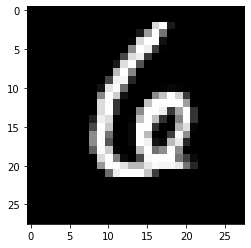

In [ ]:
import numpy as np


print('0:',predictions[num][0])
print('1:',predictions[num][1])
print('2:',predictions[num][2])
print('3:',predictions[num][3])
print('4:',predictions[num][4])
print('5:',predictions[num][5])
print('6:',predictions[num][6])
print('7:',predictions[num][7])
print('8:',predictions[num][8])
print('9:',predictions[num][9])

print("Ответ: ",np.argmax(predictions[num]))
plt.imshow(x_test[num].reshape((28,28)),cmap = 'gray')